In [2]:
from hyperion.model import Model, ModelOutput
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
rtout = '/Volumes/SD-Mac/model65.rtout'
m = ModelOutput(rtout)

grid = m.get_quantities()
ri, thetai, phii = grid.r_wall, grid.t_wall, grid.p_wall
t = grid['temperature'][0].array.T
rho = grid['density'][0].array.T

In [14]:
print(list(range(4)))

[0, 1, 2, 3]


In [45]:
mass_grid = np.empty_like(t)

for ir in range(len(ri)-1):
    for itheta in range(len(thetai)-1):
        for iphi in range(len(phii)-1):
            # determine the volume of the cell
            V = 1/3.*(ri[ir+1]**3-ri[ir]**3)*\
                (phii[iphi+1]-phii[iphi])*\
                (np.cos(thetai[itheta])-np.cos(thetai[itheta+1]))
            mass_grid[ir, itheta, iphi] = V*rho[ir, itheta, iphi]

In [58]:
10**np.arange(0.7,3.4,0.2)

array([    5.01187234,     7.94328235,    12.58925412,    19.95262315,
          31.6227766 ,    50.11872336,    79.43282347,   125.89254118,
         199.5262315 ,   316.22776602,   501.18723363,   794.32823472,
        1258.92541179,  1995.26231497])

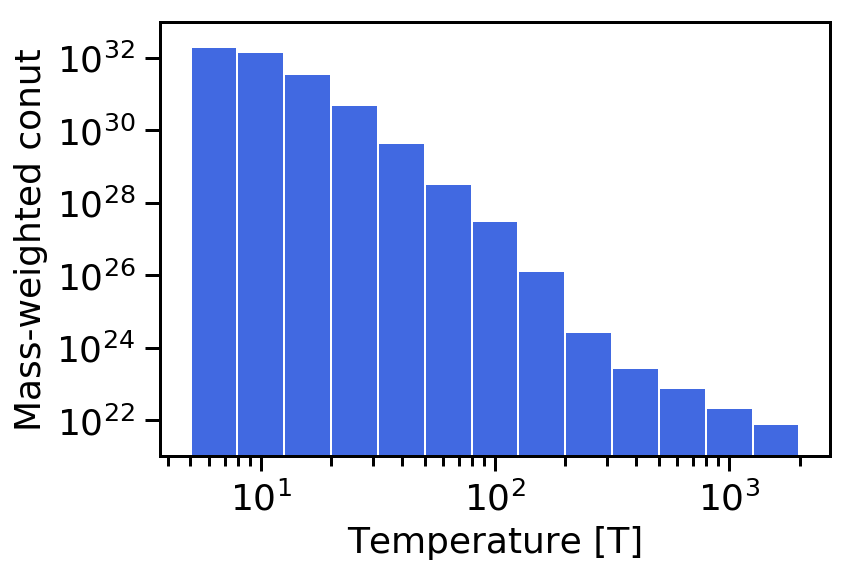

In [69]:
# create the figure object and add an axis object in the figure
fig = plt.figure()
ax = fig.add_subplot(111)

t_bins = 10**np.arange(0.7, 3.4, 0.2)

# plot the histogram on the axis
ax.hist(t.flatten(), bins=t_bins, weights=mass_grid.flatten(), facecolor='royalblue', edgecolor='w')

# set the x, y-axis in log scale
ax.set_xscale('log')
ax.set_yscale('log')
# make the box thicker
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
# enable minor ticks
ax.minorticks_on()
# make the major and minor ticks thicker and longer, also define the fontsize for the tick labels
# The pad controls the spacing between the ticks and the labels
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=7.5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=5)
# set the x, y axis labels
ax.set_xlabel('Temperature [T]', fontsize=18)
ax.set_ylabel('Mass-weighted conut', fontsize=18)
# set the y range
ax.set_ylim([1e21, 1e33])

# save the figure to pdf
fig.savefig('/Users/yaolun/research/cops-spire/mass_temp_distribution.pdf',
            format='pdf', dpi=300, bbox_inches='tight')